In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras
import datetime

In [2]:
stock = pd.read_csv('Google_Stock_Price_Train.csv',index_col = "Date",parse_dates = True)

In [3]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [5]:
stock.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
stock.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


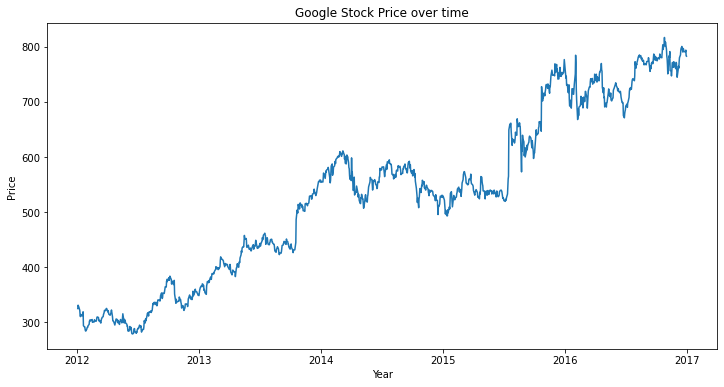

In [7]:
plt.figure(figsize=(12,6))
plt.plot(stock['Open'])
plt.title("Google Stock Price over time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [8]:
stock['Close'] = stock['Close'].str.replace(',','').astype(float)

In [9]:
stock['Volume'] = stock['Volume'].str.replace(',','').astype(float)

In [10]:
stock.rolling(7).mean().tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,794.831429,797.558571,789.387143,793.571429,1.294329e+06
2016-12-27,793.880000,796.824286,788.635714,792.671429,1.174700e+06
2016-12-28,792.922857,795.877143,787.622857,791.850000,9.904143e+05
2016-12-29,791.938571,794.201429,786.572857,790.220000,9.207286e+05
2016-12-30,789.937143,791.934286,783.307143,786.705714,1.037729e+06


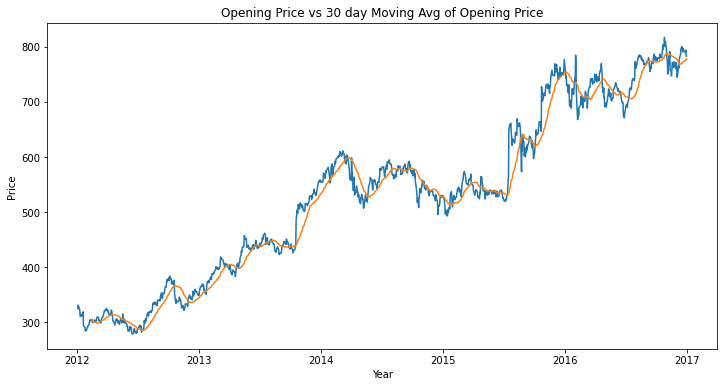

In [11]:
plt.figure(figsize = (12,6))
plt.plot(stock['Open'])
plt.title("Opening Price vs 30 day Moving Avg of Opening Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.plot(stock['Open'].rolling(30).mean())

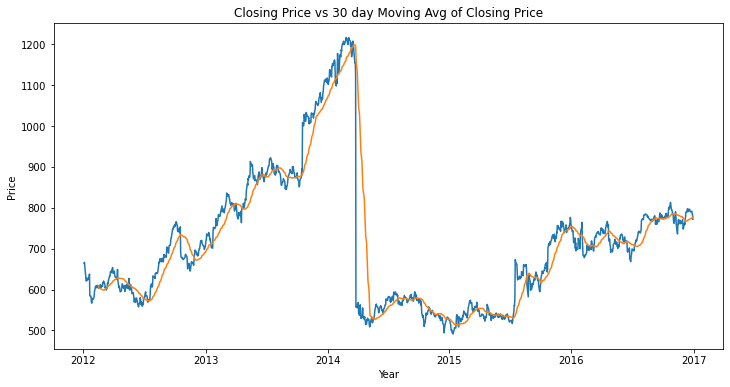

In [12]:
plt.figure(figsize= (12,6))
plt.plot(stock['Close'])
plt.title("Closing Price vs 30 day Moving Avg of Closing Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.plot(stock['Close'].rolling(30).mean())

In [13]:
train = pd.DataFrame(stock['Open'])

# Data Preprocessing



## Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train)

In [15]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building the RNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor = Sequential()

In [18]:
#First LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Second LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

#Third LSTM Layer
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

#Fourth LSTM Layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output Layer
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 31s 114ms/step - loss: 0.0738
Epoch 2/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0060
Epoch 10/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0037
Epoch 13/100

38/38 [==============================] - 5s 145ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0014


# Now, making predictions using the test dataset

In [20]:
stock_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col = "Date", parse_dates = True)

In [21]:
actual_stock = stock_test.iloc[:,1:2].values

In [22]:
stock_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
stock_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [24]:
stock_test['Volume'] = stock_test['Volume'].str.replace(',','').astype(float)

In [25]:
test = pd.DataFrame(stock_test['Open'])

In [26]:
stock_total = pd.concat((stock['Open'],stock_test['Open']), axis = 0)
inputs = stock_total[len(stock_total) - len(stock_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
stock_prediction = regressor.predict(x_test)
stock_prediction = sc.inverse_transform(stock_prediction)

In [27]:
stock_prediction = pd.DataFrame(stock_prediction)

# Visualizing the Results

[]

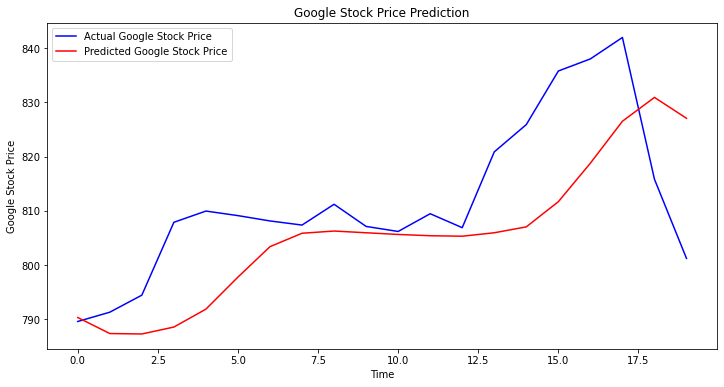

In [28]:
plt.figure(figsize = (12,6))
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.plot(actual_stock, color = 'blue',label = 'Actual Google Stock Price')
plt.plot(stock_prediction,color = 'red', label = 'Predicted Google Stock Price')
plt.legend()
plt.plot()